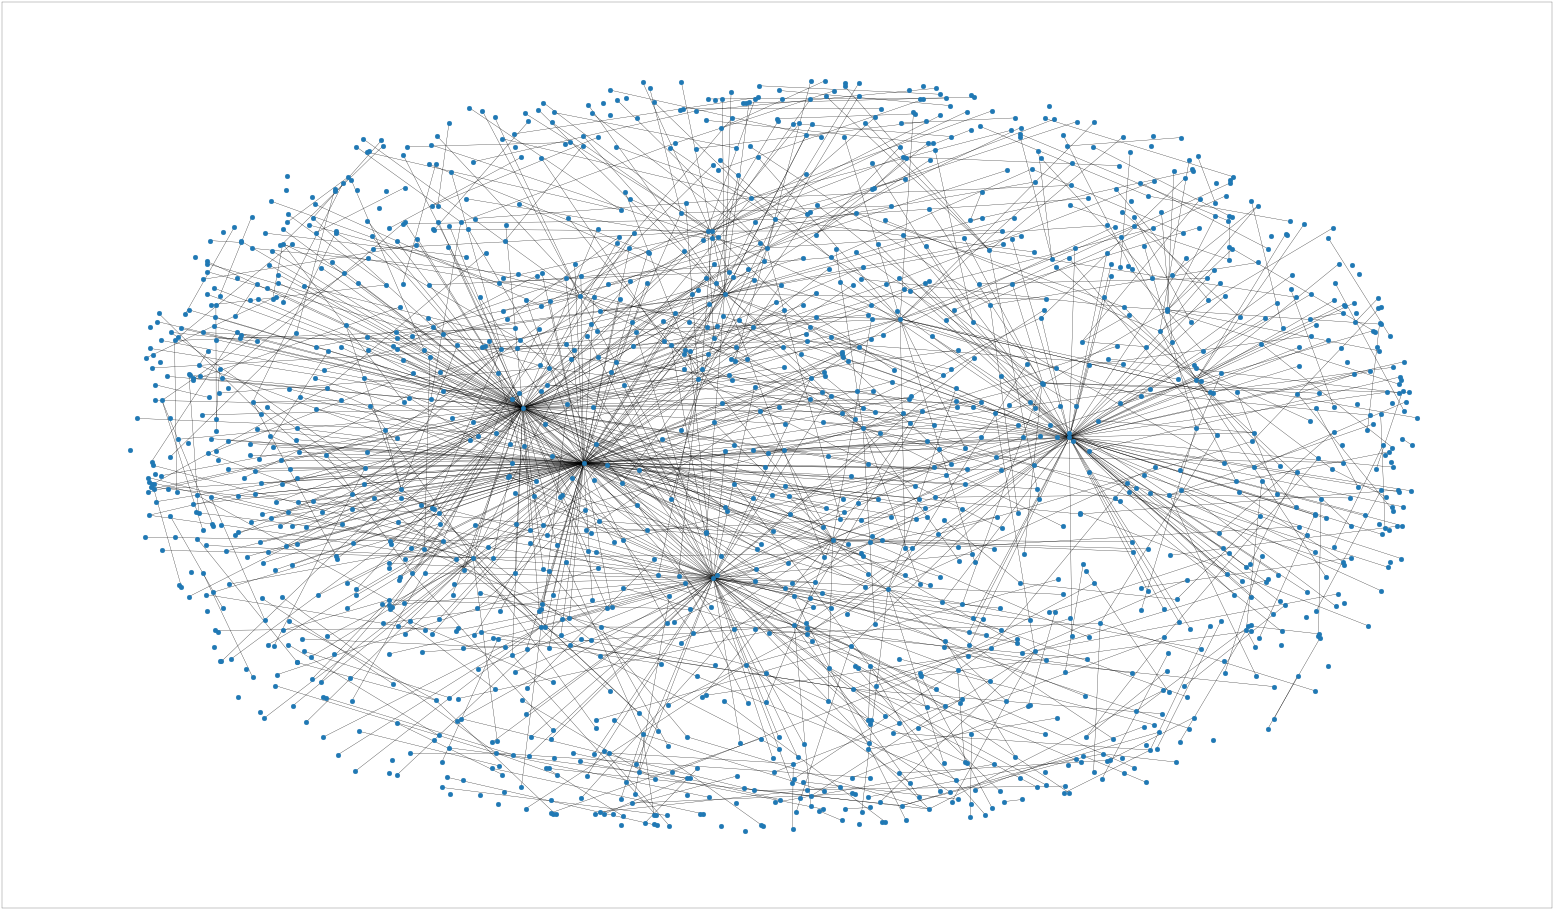

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict

G = nx.Graph()

nodes = []
data = pd.read_csv('network.csv', nrows=5000, skiprows=1)
for index, row in data.iterrows():
    if row[0] != row[1]:
        if row[0] not in nodes:
            G.add_node(row[0], text=row[16], node_size=20)
            nodes.append(row[0])
            G.add_edge(row[0], row[1], type=row[14], width=3)
        
for index, row in data.iterrows():
    if row[0] != row[1]:
        if row[1] not in nodes:
            G.add_node(row[1], text=None, node_size=20)
            nodes.append(row[1])

plt.figure(1, figsize=(100, 60), dpi=20)
pos = nx.spring_layout(G, k=0.2)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)


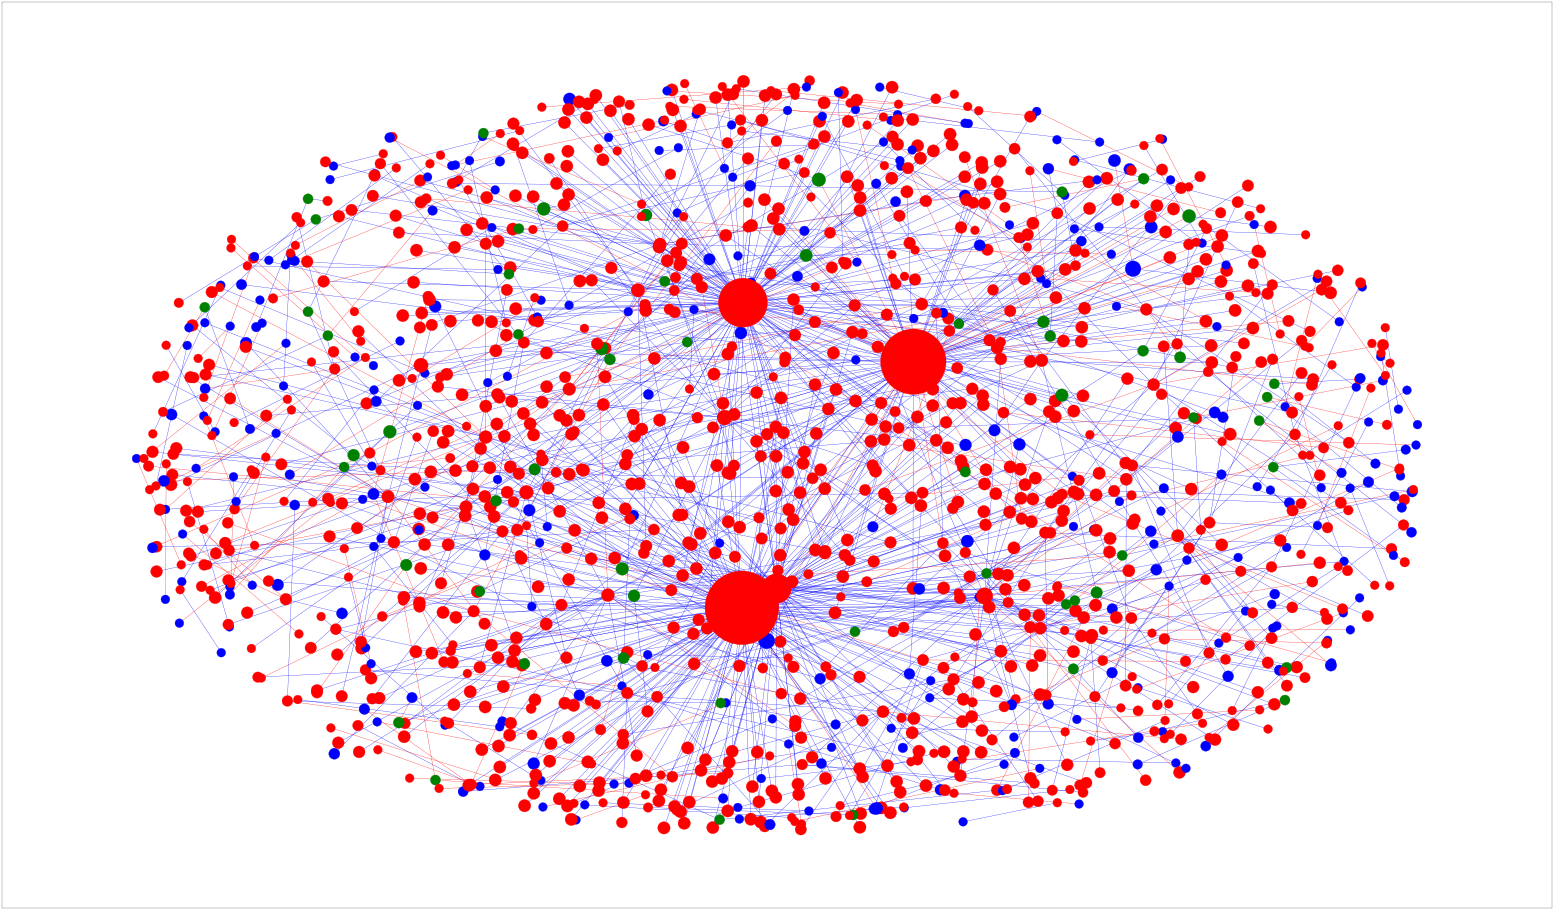

In [3]:
# Calculate in-degree, out-degree and number of relations for each node
outdegree_counts = {}
indegree_counts = {}
edges_colors = {}
edges_counts = {}


for edge in G.edges(data=True):
    
    if edge[0] in outdegree_counts:
        outdegree_counts[edge[0]] += 1
    else:
        outdegree_counts[edge[0]] = 1
        
    if edge[1] in indegree_counts:
        indegree_counts[edge[1]] += 1
    else:
        indegree_counts[edge[1]] = 1
        
    if (edge[0], edge[1]) in edges_colors:
        if edge[2]['type'] == 'Mentions':
            edges_colors[(edge[0], edge[1])] += 1
        else:
            edges_colors[(edge[0], edge[1])] -= 1
    else:
        if edge[2]['type'] == 'Mentions':
            edges_colors[(edge[0], edge[1])] = 1
        else:
            edges_colors[(edge[0], edge[1])] = -1
    if edges_colors[(edge[0], edge[1])] == 0:
        edge[2]['color'] = 'green'
    elif edges_colors[(edge[0], edge[1])] > 0:
        edge[2]['color'] = 'blue'
    else:
        edge[2]['color'] = 'red'
        
    if (edge[0], edge[1]) in edges_counts:
        edges_counts[(edge[0], edge[1])] += 1
    else:
        edges_counts[(edge[0], edge[1])] = 1
        
# Calculate betweenness and closeness for each node
betweenness_counts = OrderedDict()
closeness_counts = OrderedDict()
node_colors = OrderedDict()
sizes = OrderedDict()

for to_node in nodes:
    if to_node not in betweenness_counts:
        betweenness_counts[to_node] = 1000
    for from_node in nodes:
        if to_node != from_node:
            if nx.has_path(G, to_node, from_node):
                path = nx.shortest_path(G, to_node, from_node)[1:-1]
                for path_node in path:
                    if path_node in betweenness_counts:
                        betweenness_counts[path_node] += 1
                    else:
                        betweenness_counts[path_node] = 1001
                if to_node in closeness_counts:
                    closeness_counts[to_node] += 1000/(len(path)+1)
                else:
                    closeness_counts[to_node] = 1000/(len(path)+1)
    
    if to_node not in closeness_counts:
        closeness_counts[to_node] = 0
    if to_node not in betweenness_counts:
        betweenness_counts[to_node] = 0
        
    if to_node not in sizes:
        sizes[to_node] = (2*betweenness_counts[to_node]*closeness_counts[to_node])/(betweenness_counts[to_node]+closeness_counts[to_node])
    
    if to_node not in outdegree_counts and to_node not in indegree_counts:
        node_colors[to_node] = 'green'
    elif to_node not in outdegree_counts:
        node_colors[to_node] = 'red'
    elif to_node not in indegree_counts:
        node_colors[to_node] = 'blue'
    else:
        if outdegree_counts[to_node] > indegree_counts[to_node]:
            node_colors[to_node] = 'red'
        elif outdegree_counts[to_node] < indegree_counts[to_node]:
            node_colors[to_node] = 'blue'
        else:
            node_colors[to_node] = 'green'

edge_colors = list(nx.get_edge_attributes(G,'color').values())

node_options = {'node_size':list(sizes.values()), 'node_color':list(node_colors.values())}
edge_options = {'edge_color':edge_colors, 'width':list(edges_counts.values())}

plt.figure(1, figsize=(100, 60), dpi=20)
pos = nx.spring_layout(G, k=0.2)

nx.draw_networkx_nodes(G, pos, nodelist=sizes.keys(), **node_options)
nx.draw_networkx_edges(G, pos, edgelist=edges_counts.keys(), **edge_options)


                
            
        